In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from __future__ import division
from sympy import *
from sympy.solvers.solveset import linsolve

## Task 1 - Cross section

In [ ]:
x, y, b_w, b_f, h, E, L, pmax, k = symbols('x y b_w b_f h E L pmax k')
C1,C2,C3,C4 = symbols('C1 C2 C3 C4')

u = Function('u')

## Enter your code here
b = 2*((2 * (b_f - b_w) / (h**2)) * ((y - (h/2))**2) + (b_w/2))
# 2 times the length from the z axis to the parabola b(x)
# The coordinate system has h run along the y-axis
A = integrate(b,(y,0,h))
print('A = ')
display(A)
Q = integrate(y*b,(y,0,h))
print('Q = ')
display(Q)
I = integrate(b*y**2,(y,0,h))
print('I = ')
display(I)
## End


A = 


b_f*h + h*(-2*b_f + 2*b_w) + h*(4*b_f - 4*b_w)/3

Q = 


b_f*h**2/2 + h**2*(-4*b_f + 4*b_w)/3 + h**2*(b_f - b_w)

I = 


b_f*h**3/3 + h**3*(-b_f + b_w) + h**3*(4*b_f - 4*b_w)/5

## Task 2 - ODE

In [ ]:
## Enter your code here

ODE = (E*I*Derivative(u(x),x,x,x,x)) - (pmax - (((4*pmax)/L**2)*(x-(L/2))**2))

## End

print('0 = ')
display(ODE)

0 = 


E*(b_f*h**3/3 + h**3*(-b_f + b_w) + h**3*(4*b_f - 4*b_w)/5)*Derivative(u(x), (x, 4)) - pmax + 4*pmax*(-L/2 + x)**2/L**2

## Task 3 - general solution

In [ ]:

## Enter your code here

u = dsolve(ODE,u(x)).rhs

print('u=')
display(u)
## End

du    = u.diff(x)
ddu   = u.diff(x,x)
dddu  = u.diff(x,x,x)

u=


C1 + C2*x + C3*x**2 + C4*x**3 + pmax*x**5/(2*E*L*h**3*(2*b_f + 3*b_w)) - pmax*x**6/(6*E*L**2*h**3*(2*b_f + 3*b_w))

## Task 4 - boundary conditions

In [ ]:
## Enter your code here

#double clamped beam has these boundary conditions.
print('double clamped beam has these boundary conditions.')

bc1 = u.subs(x,0)
bc2 = du.subs(x,0)
bc3 = u.subs(x,L)
bc4 = du.subs(x,L)

## End

double clamped beam has these boundary conditions.


## Task 5 - Integration constants

In [ ]:
## Enter your code here


# the four bcs and four IC unknowns form a linear system of equations which can be solved
sol=linsolve([bc1, bc2, bc3, bc4], (C1,C2,C3,C4))

# then you assign the solution to the C1 to C4 variables
[C1sol,C2sol,C3sol,C4sol] = list(sol)[0]

## End

usol= u.subs([(C1,C1sol), (C2,C2sol), (C3,C3sol), (C4,C4sol)])

print('u(x)=')
display(usol)

u(x)=


L**2*pmax*x**2/(4*E*b_f*h**3 + 6*E*b_w*h**3) - 5*L*pmax*x**3/(12*E*b_f*h**3 + 18*E*b_w*h**3) + pmax*x**5/(2*E*L*h**3*(2*b_f + 3*b_w)) - pmax*x**6/(6*E*L**2*h**3*(2*b_f + 3*b_w))

## Task 6 - define moment, shear and stress

In [ ]:
## Enter your code here


M = E*I*ddu
V = E*I*dddu

sigmaxx = M * y / I
sigmaxy = V * Q / (b * I)
sigmavm2 = ((sigmaxx**2) / (3*sigmaxy**2))**2

## End*

## Task 7 - Explanation

We set both $h$ and $b_\mathrm{w}$ as optimization variables, we aim to minimize the weight of structure while keeping 

\begin{equation}
\begin{aligned}
\min_{h,b_\mathrm{w}} \quad & \mathrm{A(y) L \rho}\\
\textrm{s.t.} \quad & \sigma_\mathrm{vm}^2-\sigma_\mathrm{y}^2 < 0\\
& u_\mathrm{max}-u_\mathrm{limit} < 0\\
& b_\mathrm{w}-b_\mathrm{min} < 0\\
& h-h_\mathrm{min} < 0\\
\end{aligned}
\end{equation}


**Explain what each line above means (double click here and type)**

**NOTE:** The inequality constraints in the problem statement for b_w, and h are flipped 

**Answer:**

1.   The squared von Mises stress must be less than the sqyared sigma y
2.   The displacement must be less than the limit displacement
3.   The curve in the side of the beam must be greater than the minumum allowed curve
4. The height of the beam must be greater than the minimum allowed height








## Task 8 - Substitution

In [ ]:
# Defining parameters
valE      = 200e9  # Pa
valL      = 15     # m
valb_f    = 0.25   # m
valpmax      = -20000 # N/m

u_limit     = valL/250
sigma_y   = 180e6 # Pa

h_min     = 0.01 #m
h_max     = 0.5 #m

b_min     = 0.01 #m
b_max     = valb_f #m

## Enter your code here

sigma_y2 = sigma_y**2


uSub  = usol.subs([(x,L/2),(E, valE),(L, valL),(b_f, valb_f),(pmax,valpmax)])
#made x = L/2 because that is where max deflection is
print('made x = L/2 because that is where max deflection is')
MSub  = M.subs([(x,L/2),(E, valE),(b_f, valb_f)])
#made x = L/2 because that is where max moment is
VSub  = V.subs([(x,L/2),(E, valE),(b_f, valb_f)])
ISub  = I.subs([(b_f, valb_f)])
QSub  = Q.subs([(b_f, valb_f)])


# end


made x = L/2 because that is where max deflection is


## Task 9 - Lambdify

In [ ]:
## Enter your code here

def diff(x,y):
    ''' Central difference method of differentation'''
    dy = []
    
    # Use forward difference for the first value
    dy.append((y[1]-y[0])/(x[1]-x[0]))
    
    for i in range(1,len(x)-1):
        dy.append((y[i+1]-y[i-1])/(x[i+1]-x[i-1]))
        
    # Use backward difference for the last value
    dy.append((y[-1]-y[-2])/(x[-1]-x[-2]))
    
    return np.array(dy)

# lambdify converts a symbolic equation into a python function (with the variables b and h being input parameters) 
uFun  = lambdify([h,b_w], uSub)
#duFun = lambdify(x, diff(uSub,x))
sigmavmFun = lambdify([h,b_w],(((((MSub*h/ISub))**2+((VSub*QSub)/(b*ISub)))**2))**(1/2))
#MFun  = lambdify(x, valE*ISub*diff(uSub,x,x))
#Fun  = lambdify(x, valE*ISub*diff(uSub,x,x,x))

# end

## Task 10

In [ ]:
n = 500

var_h   = np.linspace(0.0001, h_max, n)
var_b = np.linspace(0.0001, b_max, n)

## Enter your code here

valx = np.linspace(0,valL,n)

# meshgrid allows us to weave these two variables to arrive at n^2 points for calculation
optVar_h, optVar_b_w = np.meshgrid(var_h, var_b)

# calculate the objective (area), note that we can calculate the volume or the mass by linear scaling (density and length)
aNum        = optVar_h*optVar_b_w     #Same as mass because constant density
# calculate the difference in displacement between the actual and the maximum allowed
uNum        = (uFun(optVar_h, optVar_b_w) + u_limit/2)
# calculate the difference in stres between the actual and the maximum allowed

#sigmaNum  = sigmavmFun(optVar_h, optVar_b_w) - sigma_y2
#Had to comment out because of some issue where it gets stuck in an endless loop
print('Had to comment out sigma because of some issue where it gets stuck in an endless loop')

# end


Had to comment out sigma because of some issue where it gets stuck in an endless loop


## Task 11 - plotting

0.013710937500000001 is less than the limit:
0.06 at the midpoint of the length.
These numbers are found with H = 0.25  and B =  0.1


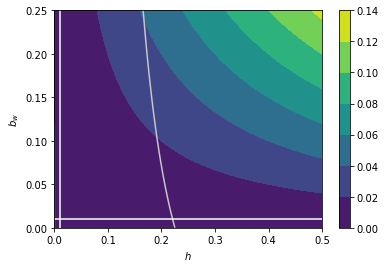

In [ ]:

## Enter your code here

# Plot using plt.contourf() to plot the mass objective

testH = 0.25
testB = 0.1
testU = uFun(testH,testB)
print(-1*testU, 'is less than the limit:')
print(u_limit, 'at the midpoint of the length.')
print('These numbers are found with H =', testH, ' and B = ', testB)

plt.contourf(optVar_h, optVar_b_w, aNum)

# Plot using plt.contour() to plot the constraints (all of them), e.g. plt.contour(x,y,z, 1, cmap='Greys')

## End


plt.colorbar()

plt.contour(optVar_h, optVar_b_w, -1*uNum, 1, cmap='Greys')
#plt.contour(optVar_h, optVar_b_w, np.sign(sigmaNum),1, cmap='Reds')
#commented out because of problem with function stated above


plt.plot([0.,   h_max], [h_min,h_min], 'white')
plt.plot([b_min,b_min], [0.,   b_max], 'white')

plt.xlabel(r'$h$')
plt.ylabel(r'$b_w$')

plt.xlim([0.,h_max])
plt.ylim([0.,b_max])

plt.show()